In [17]:
import gradio as gr


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
import pathlib
dataset_url = r'C:\Users\vivek\Dropbox\My PC (LAPTOP-49G8EKBA)\Desktop\flower_photos'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

C:\Users\vivek\.keras\datasets\flower_photos\roses\10503217854_e66a804309.jpg


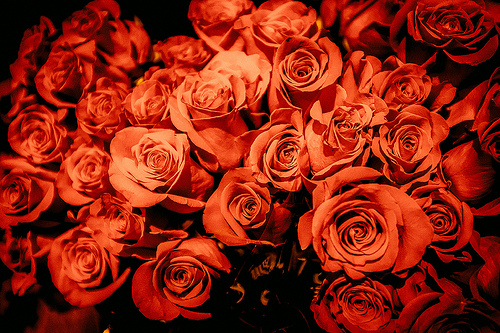

In [20]:
roses = list(data_dir.glob('roses/*'))
print(roses[2])
PIL.Image.open(str(roses[2]))

In [21]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


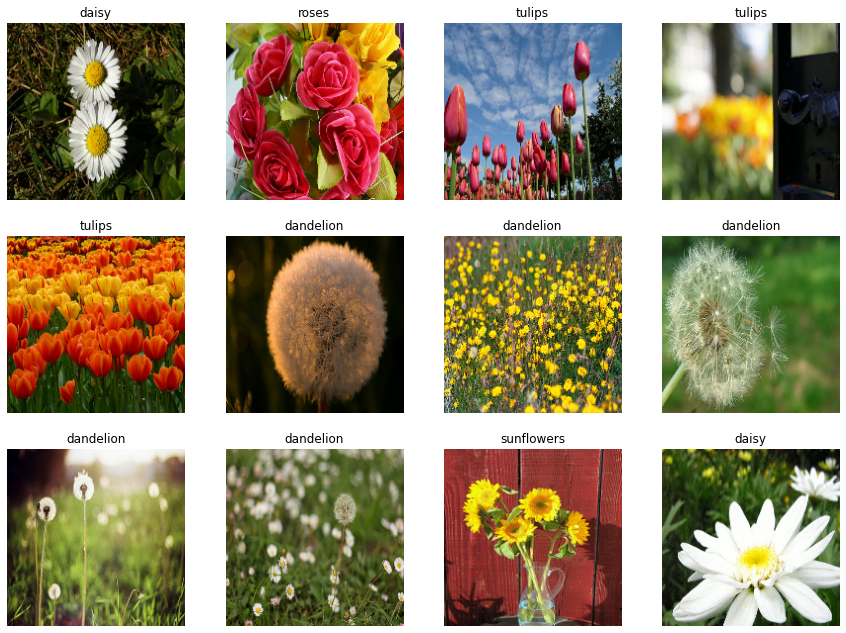

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(2):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 5,verbose = 0)

In [28]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose = 1,
  callbacks = [early_stopping]
)

Epoch 1/100
92/92 [==============================] - 37s 395ms/step - loss: 1.2874 - accuracy: 0.4584 - val_loss: 1.0578 - val_accuracy: 0.5981
Epoch 2/100
92/92 [==============================] - 41s 440ms/step - loss: 0.9795 - accuracy: 0.6213 - val_loss: 1.0436 - val_accuracy: 0.5654
Epoch 3/100
92/92 [==============================] - 43s 469ms/step - loss: 0.8189 - accuracy: 0.6935 - val_loss: 0.9776 - val_accuracy: 0.6117
Epoch 4/100
92/92 [==============================] - 40s 435ms/step - loss: 0.6123 - accuracy: 0.7783 - val_loss: 0.9406 - val_accuracy: 0.6635
Epoch 5/100
92/92 [==============================] - 40s 432ms/step - loss: 0.4357 - accuracy: 0.8358 - val_loss: 0.9798 - val_accuracy: 0.6540
Epoch 6/100
92/92 [==============================] - 38s 410ms/step - loss: 0.2514 - accuracy: 0.9131 - val_loss: 1.4391 - val_accuracy: 0.5695
Epoch 7/100
92/92 [==============================] - 40s 436ms/step - loss: 0.1514 - accuracy: 0.9554 - val_loss: 1.3979 - val_accuracy:

In [14]:
from keras.models import load_model
model.save('model_flower.h5')


In [22]:
model_flower = load_model('model_flower.h5')

In [23]:
def predict_image(img):
  img_2d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_2d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [24]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(share=True)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.9, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://ba8355c2dc474085.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x1c400092c10>,
 'http://127.0.0.1:7861/',
 'https://ba8355c2dc474085.gradio.app')

1/1 [==============================] - 0s 338ms/step
